In [1]:
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE 
import pandas as pd
import seaborn as sns
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [ ]:

emp = df['DAYS_EMPLOYED']
emp.plot.bar(stacked=True)

In [24]:
print(df.shape)
df.columns

(307511, 614)


Index(['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       ...
       'client_cash_NAME_CONTRACT_STATUS_Active_sum_sum',
       'client_cash_CNT_INSTALMENT_min_sum',
       'client_cash_CNT_INSTALMENT_mean_sum',
       'client_cash_CNT_INSTALMENT_max_sum',
       'client_cash_CNT_INSTALMENT_count_sum',
       'client_cash_CNT_INSTALMENT_FUTURE_count_sum',
       'client_cash_NAME_CONTRACT_STATUS_Active_count_sum',
       'client_cash_CNT_INSTALMENT_FUTURE_sum_sum',
       'client_cash_CNT_INSTALMENT_sum_sum', 'y'],
      dtype='object', length=614)

In [16]:
# df = df.replace([np.inf], 1e10)
# df = df.replace([-np.inf], -1e10)
# df = df.fillna(0)

In [25]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.values)

In [26]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.08198229 0.06503915 0.0455887 ]


In [27]:
df

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,client_cash_CNT_INSTALMENT_max_sum,client_cash_CNT_INSTALMENT_count_sum,client_cash_CNT_INSTALMENT_FUTURE_count_sum,client_cash_NAME_CONTRACT_STATUS_Active_count_sum,client_cash_CNT_INSTALMENT_FUTURE_sum_sum,client_cash_CNT_INSTALMENT_sum_sum,y,pca-one,pca-two,pca-three
0,0.0,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,0.888839,...,0.057809,0.018939,0.018939,0.018888,0.025914,0.021295,1,-0.614270,0.964927,0.359277
1,0.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,0.477114,...,0.036511,0.014270,0.014270,0.014218,0.007695,0.006980,0,0.221227,1.154171,-0.563268
2,1.0,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,0.134897,0.348534,...,0.002028,0.000839,0.000839,0.000787,0.000172,0.000147,0,-0.853158,-0.630926,0.833521
3,0.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,0.350846,...,0.045639,0.008656,0.008656,0.009024,0.006193,0.004695,0,-0.371808,-0.697692,-0.812613
4,0.0,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,0.298591,...,0.129817,0.047532,0.047532,0.047482,0.038783,0.034725,0,-0.744459,-0.921604,0.576625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,0.0,0.0,0.0,0.001127,0.052360,0.101176,0.046016,0.446855,0.896392,...,0.009128,0.003777,0.003777,0.004197,0.001507,0.001394,0,-0.455347,1.100007,0.603859
307507,0.0,0.0,1.0,0.0,0.000396,0.056067,0.040505,0.046016,0.344429,0.251071,...,0.005325,0.002571,0.002571,0.002518,0.000703,0.000723,0,2.035885,0.549222,-0.072950
307508,0.0,0.0,1.0,0.0,0.001089,0.157969,0.110618,0.135802,0.065247,0.578523,...,0.014452,0.005299,0.005299,0.005247,0.001048,0.001548,0,-0.299989,1.144646,-0.716670
307509,0.0,0.0,1.0,0.0,0.001243,0.081175,0.072499,0.069585,0.069553,0.747914,...,0.037779,0.010598,0.010598,0.010546,0.009863,0.007349,1,-0.197336,0.294546,-0.438302


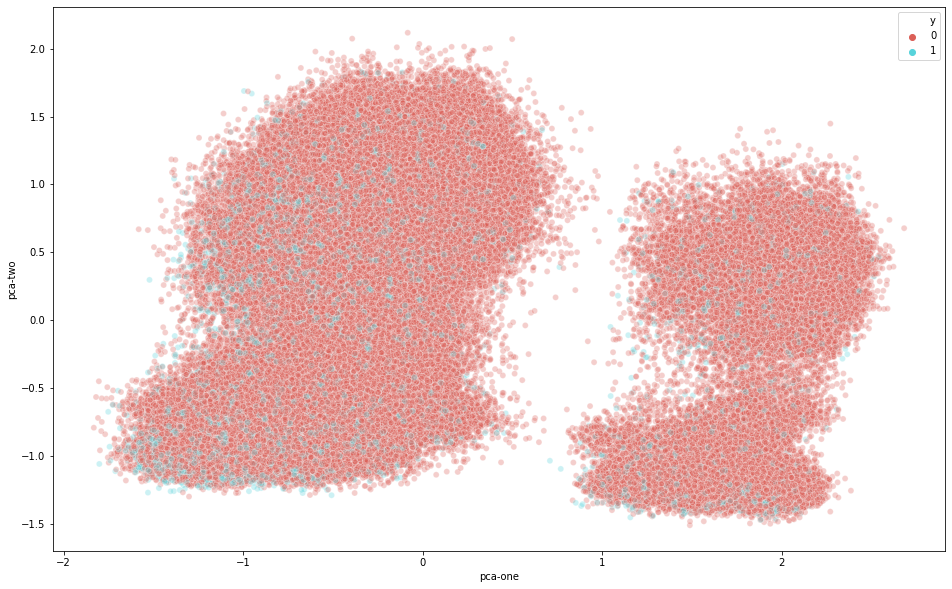

In [30]:
rndperm = np.random.permutation(df.shape[0])
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

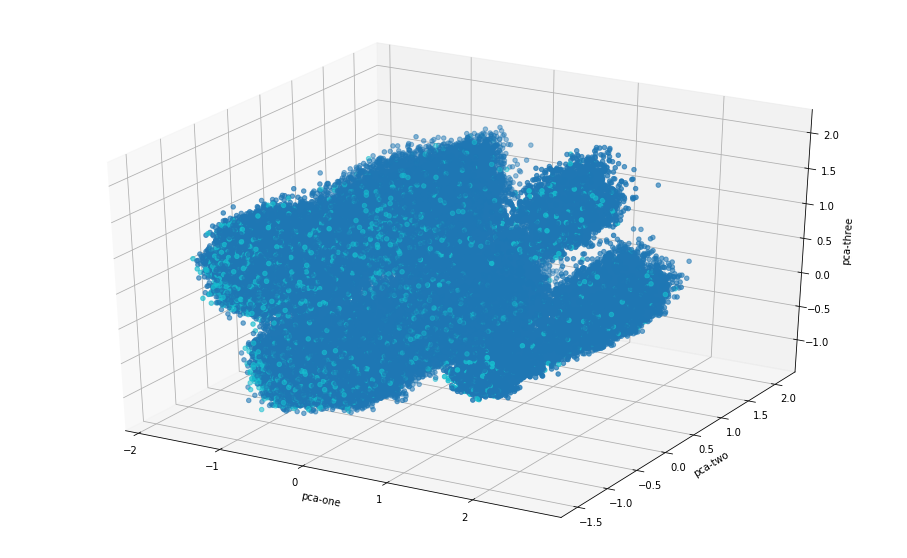

In [32]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()


In [34]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset.values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.13615884 0.10995844 0.07598618]


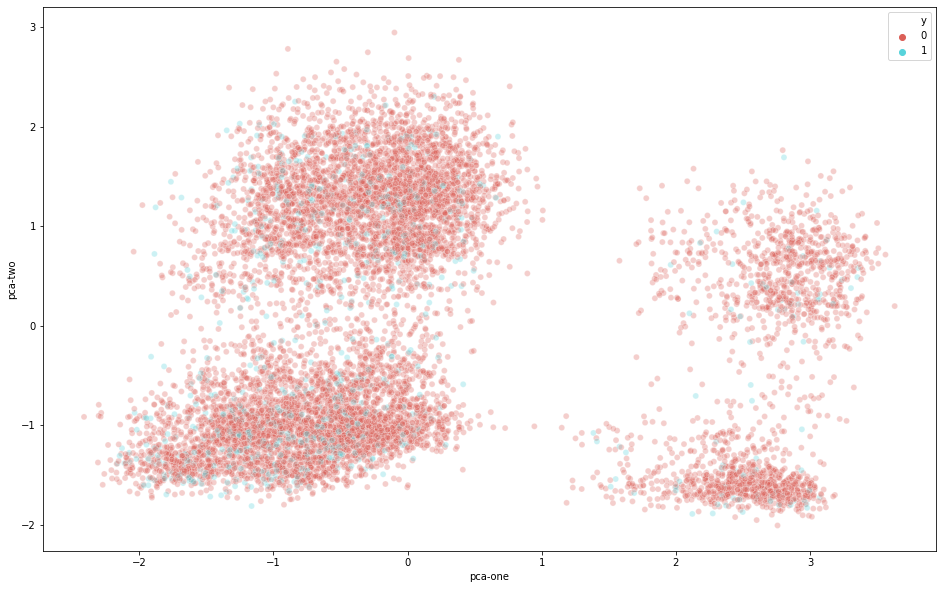

In [35]:

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [36]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.386s...
[t-SNE] Computed neighbors for 10000 samples in 87.998s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.030688
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.630653
[t-SNE] KL divergence after 300 iterations: 3.173993
t-SNE done! Time elapsed

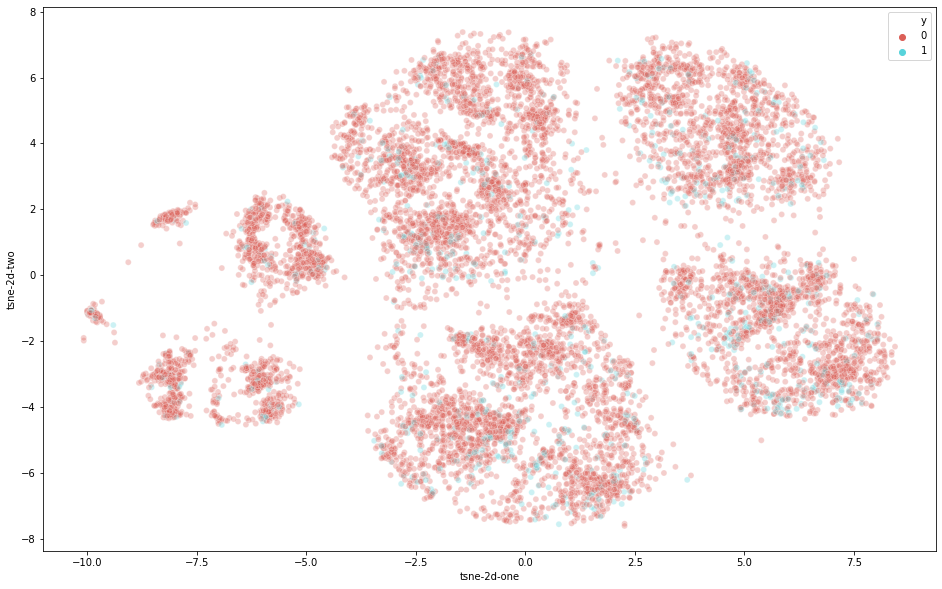

In [38]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [39]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8593584947597507


In [40]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 56.50435829162598 seconds


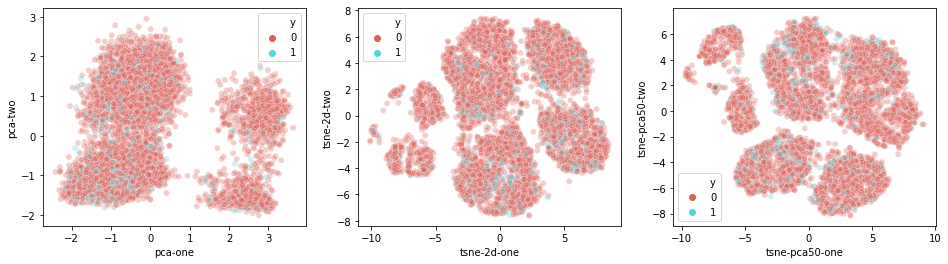

In [41]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

In [47]:
N = 1000
df_subset2 = df.loc[rndperm[:N],:].copy()
data_subset2 = df_subset2.values

In [48]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset2)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8711649733993378


In [49]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 3.179719924926758 seconds


ValueError: Could not interpret input 'tsne-2d-one'

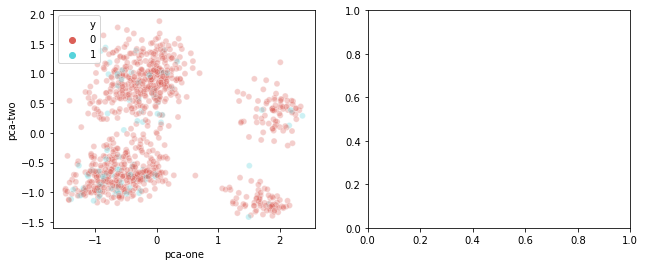

In [50]:
df_subset2['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset2['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax3
)